In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import zscore

In [2]:
benin_df = pd.read_csv("../data/benin-malanville.csv")
sierraleone_df = pd.read_csv("../data/sierraleone-bumbuna.csv")
togo_df = pd.read_csv("../data/togo-dapaong_qc.csv")


In [3]:
benin_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
sierraleone_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [5]:
togo_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [6]:
benin_df.shape

(525600, 19)

In [7]:
sierraleone_df.shape

(525600, 19)

In [8]:
togo_df.shape

(525600, 19)

In [9]:
togo_df.shape

(525600, 19)

# Quality check for all three datas


### Checking for Null Values in the Datasets

After removing the "Comments" column, we can confirm that there are no missing values in any of the columns across the three datasets. By concatenating the datasets, we can conveniently observe the columns side by side, which is more user-friendly compared to a long vertical output that requires a bit of scrolling.

In [10]:
togo_nulls =  togo_df.isnull().sum() 
benin_nulls= benin_df.isnull().sum()
sierraleone_nulls= sierraleone_df.isnull().sum()

nulls_df = pd.concat([togo_nulls, benin_nulls, sierraleone_nulls], axis = 1)
nulls_df.columns = ["Togo", "Benin", "Sierraleone"]
nulls_df

,Togo,Benin,Sierraleone
Timestamp,0,0,0
GHI,0,0,0
DNI,0,0,0
DHI,0,0,0
ModA,0,0,0
ModB,0,0,0
Tamb,0,0,0
RH,0,0,0
WS,0,0,0
WSgust,0,0,0


### Dropping the "Comments" Column

The "Comments" column in all three datasets contains only missing values, as confirmed by the `isnull().sum()` method. Therefore, it is appropriate to drop this column.

In [11]:
togo_df = togo_df.drop(columns = "Comments", axis = 1)
benin_df = benin_df.drop(columns = "Comments", axis = 1)
sierraleone_df = sierraleone_df.drop(columns = "Comments", axis =1 )

In the following cell we will analyze the dataset of Togo.
# TOGO dataset

# Summary statistics for TOGO
I have used pandas.describe() to get a quick summary of statistics.

In [12]:
togo_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


# Identify negative values in GHI, DNI, DHI for TOGO dataset

In [13]:
print(togo_df[(togo_df['DHI'] < 0)] )

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


In [14]:
print(togo_df[(togo_df['DNI']) < 0])

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


We can observe from the below cell that there are 257385 values which are negative values which is approximately about half of the values.

In [28]:
togo_df[(togo_df['GHI']) < 0]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Year,Month,Day,Hour
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,1.1,977,0,0.0,24.7,24.4,2021,10,25,0
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,0.7,977,0,0.0,24.7,24.4,2021,10,25,0
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,2.9,977,0,0.0,24.7,24.4,2021,10,25,0
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,4.6,977,0,0.0,24.7,24.4,2021,10,25,0
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,1.6,977,0,0.0,24.7,24.4,2021,10,25,0
5,2021-10-25 00:06:00,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,...,4.8,977,0,0.0,24.8,24.5,2021,10,25,0
6,2021-10-25 00:07:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,...,0.9,977,0,0.0,24.8,24.5,2021,10,25,0
7,2021-10-25 00:08:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,...,2.8,977,0,0.0,24.8,24.5,2021,10,25,0
8,2021-10-25 00:09:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,...,4.1,977,0,0.0,24.8,24.5,2021,10,25,0
9,2021-10-25 00:10:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,...,0.9,977,0,0.0,24.8,24.5,2021,10,25,0


# Detecting Outliers using Zscore
I have used zscore to find the extreme outliers found in the TOGO datasets.


In [16]:
z_scores = togo_df[['GHI', 'DNI', 'DHI']].apply(zscore)
outliers = z_scores[(z_scores > 3.5) | (z_scores < -3.5)]
out_sum = outliers.count().sum()
out_sum

np.int64(430)

# Time series analysis for TOGO dataset

In [17]:
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df['Year'] = togo_df['Timestamp'].dt.year
togo_df['Month'] = togo_df['Timestamp'].dt.month
togo_df['Day'] = togo_df['Timestamp'].dt.day
togo_df['Hour'] = togo_df['Timestamp'].dt.hour
togo_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Year,Month,Day,Hour
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,1.1,977,0,0.0,24.7,24.4,2021,10,25,0
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,0.7,977,0,0.0,24.7,24.4,2021,10,25,0
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,2.9,977,0,0.0,24.7,24.4,2021,10,25,0
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,4.6,977,0,0.0,24.7,24.4,2021,10,25,0
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,1.6,977,0,0.0,24.7,24.4,2021,10,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,...,0.0,977,0,0.0,24.3,24.0,2022,10,24,23
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,...,0.0,977,0,0.0,24.3,24.0,2022,10,24,23
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,...,0.0,977,0,0.0,24.2,23.9,2022,10,24,23
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,...,0.0,977,0,0.0,24.1,23.8,2022,10,24,23


<function matplotlib.pyplot.show(close=None, block=None)>

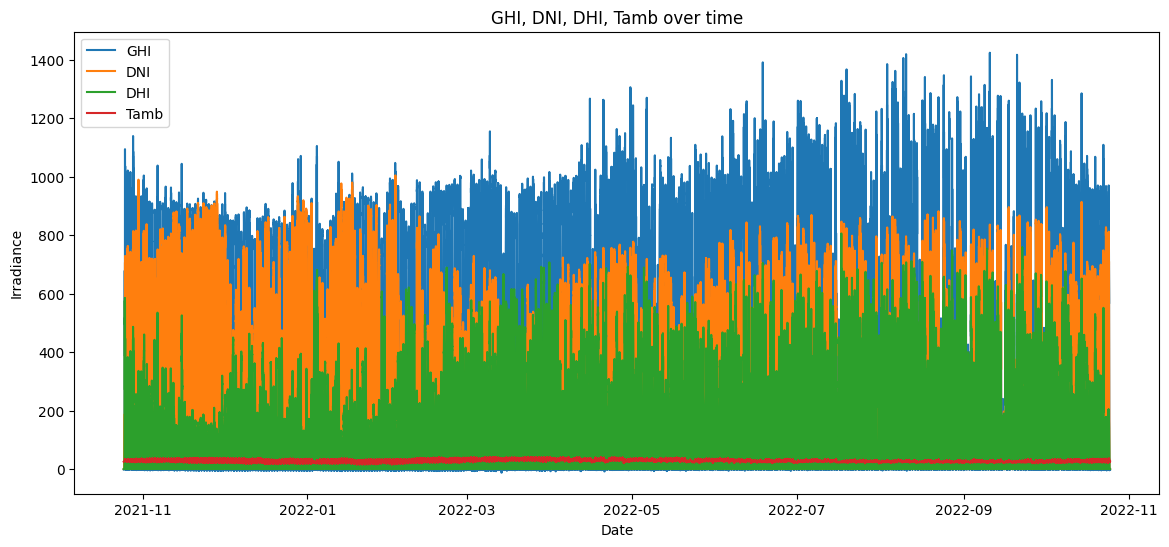

In [18]:
plt.figure(figsize = (14, 6))
plt.plot(togo_df['Timestamp'], togo_df['GHI'], label = "GHI")
plt.plot(togo_df['Timestamp'], togo_df['DNI'], label = "DNI")
plt.plot(togo_df['Timestamp'], togo_df["DHI"], label = "DHI")
plt.plot(togo_df['Timestamp'], togo_df['Tamb'], label = "Tamb")
plt.xlabel("Date")
plt.ylabel("Irradiance")
plt.title("GHI, DNI, DHI, Tamb over time")
plt.legend()
plt.show

# Impact of cleaning on ModA and ModB in TOGO dataset


In [19]:
cleaning_applied = togo_df[togo_df['Cleaning'] == 1]
cleaning_not_applied = togo_df[togo_df['Cleaning'] == 0]

<function matplotlib.pyplot.show(close=None, block=None)>

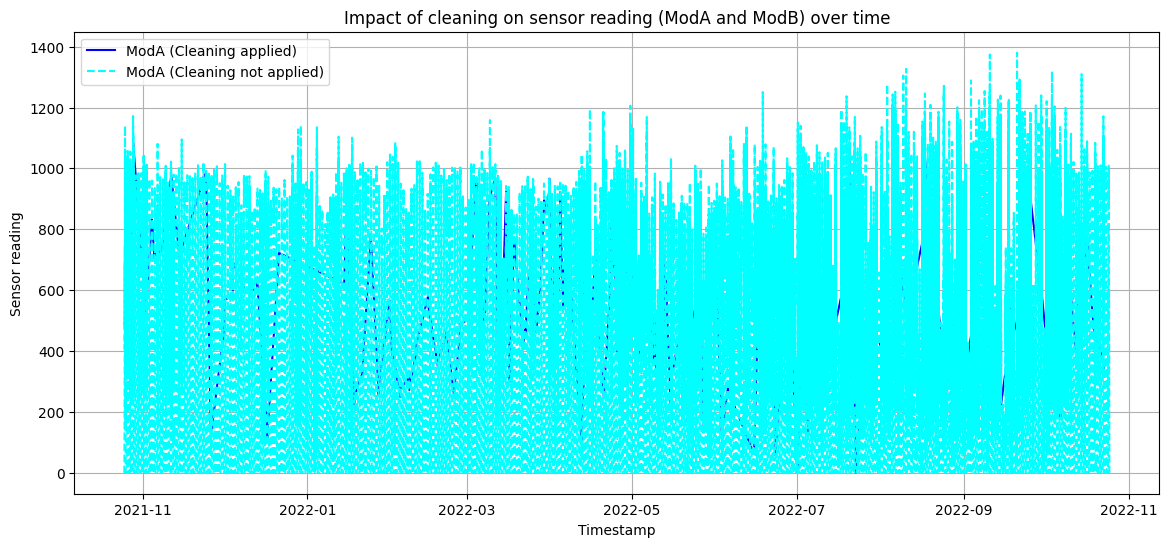

In [20]:
plt.figure(figsize = (14, 6))
plt.plot(cleaning_applied['Timestamp'], cleaning_applied['ModA'], label = 'ModA (Cleaning applied)', color ="blue")
plt.plot(cleaning_not_applied['Timestamp'], cleaning_not_applied['ModA'], label = 'ModA (Cleaning not applied)', color = "cyan", linestyle = '--')
plt.xlabel('Timestamp')
plt.ylabel('Sensor reading')
plt.title('Impact of cleaning on sensor reading (ModA and ModB) over time')
plt.legend()
plt.grid(True)
plt.show

# Correlation analysis for TOGO dataset

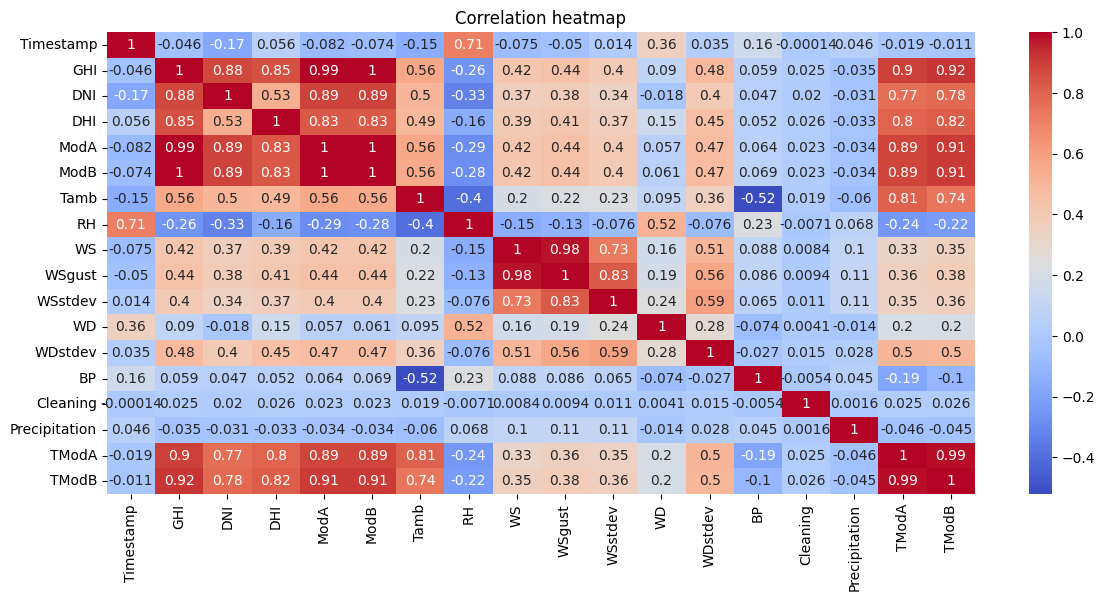

In [21]:
togo_df_corr = togo_df.drop(columns = ['Timestamp','Year', 'Month', 'Day', 'Hour'])
plt.figure(figsize = (14, 6))
sns.heatmap(togo_df_corr.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation heatmap")
plt.show()


# Relationships using scatter matrices

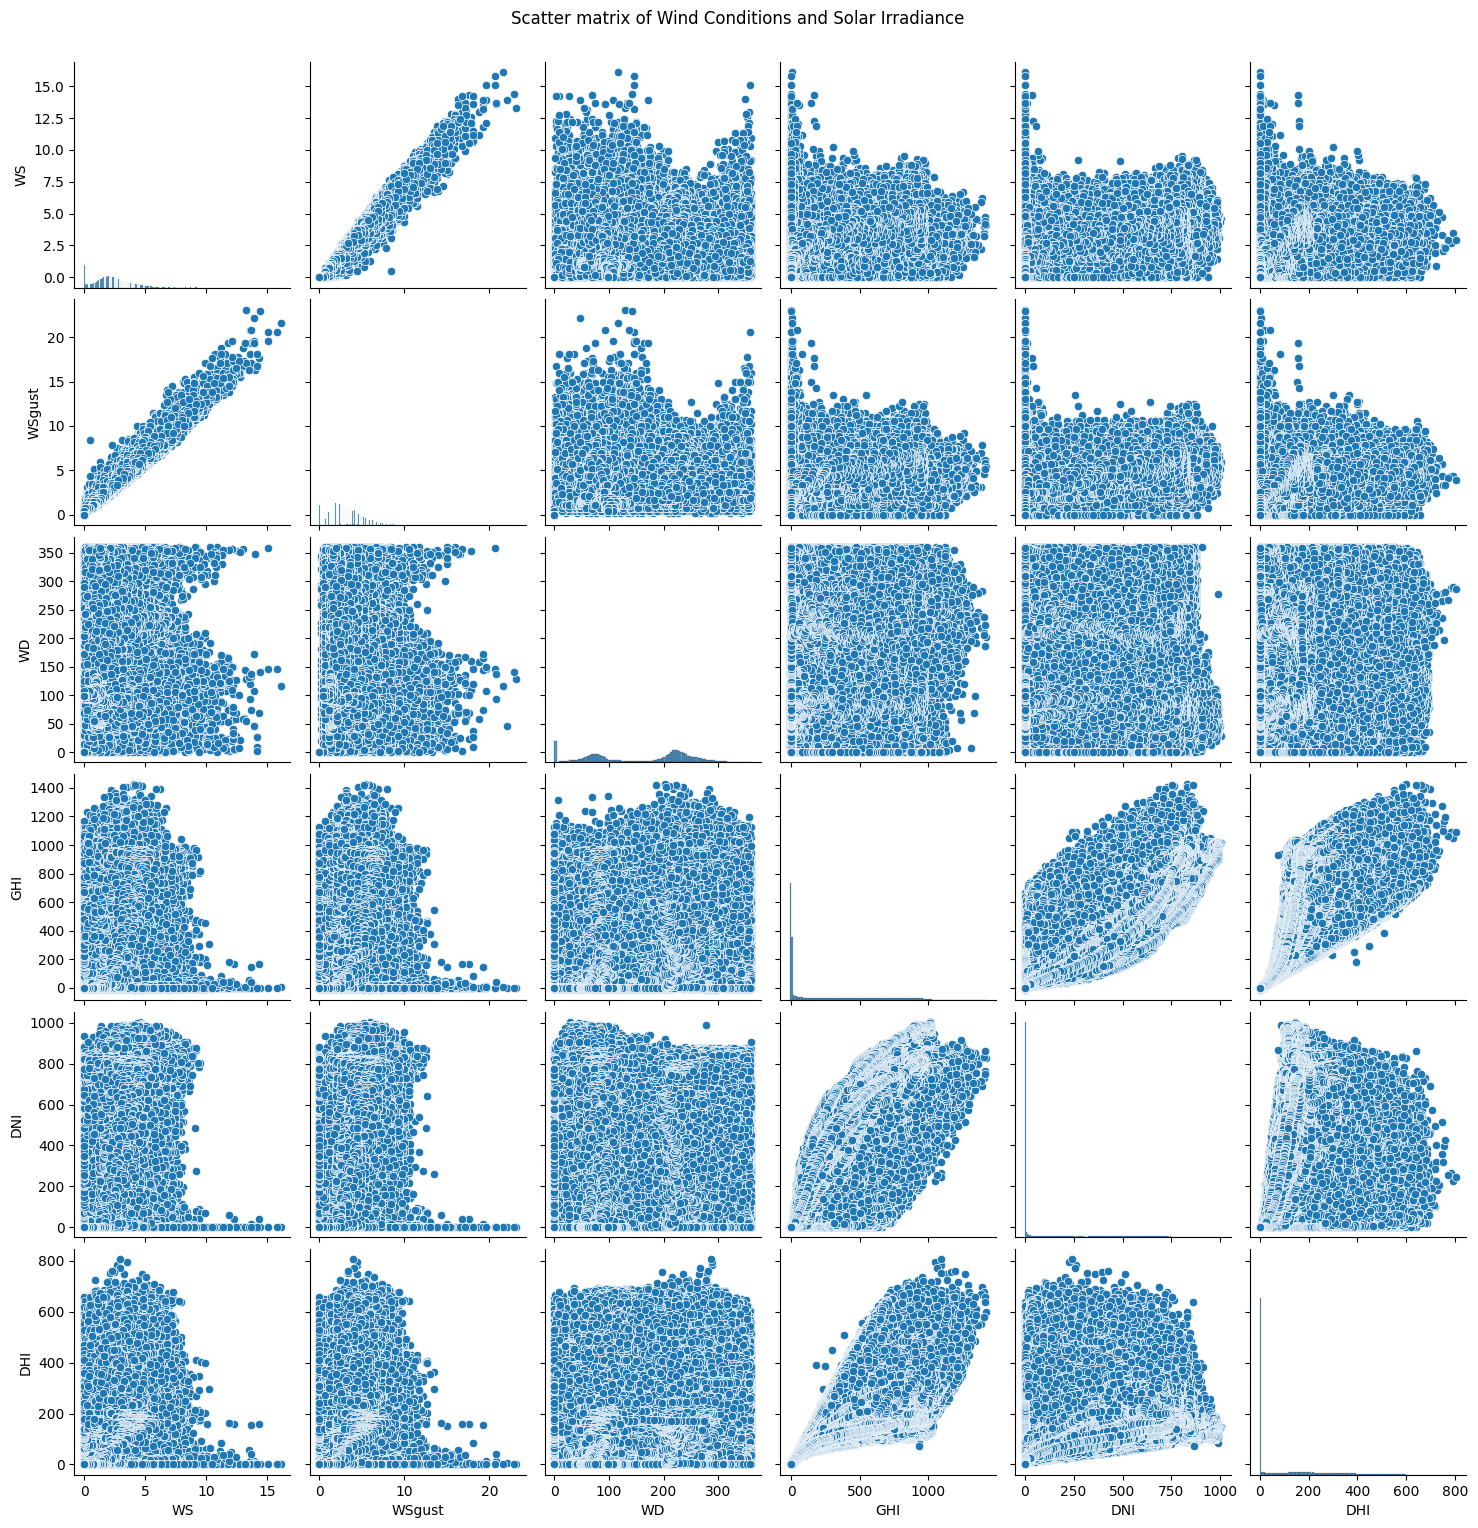

In [22]:
data = togo_df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']]
sns.pairplot(data)
plt.suptitle("Scatter matrix of Wind Conditions and Solar Irradiance", y = 1.02)
plt.show()

# Wind analysis using polar plot

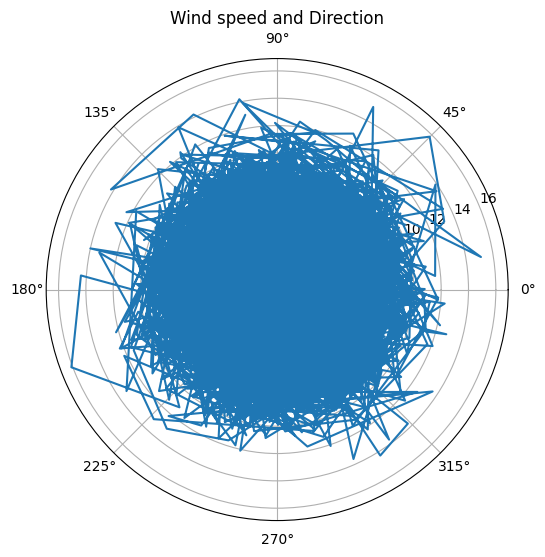

In [23]:
plt.figure(figsize = (14, 6))
plt.polar(togo_df['WD'], togo_df['WS'])
plt.title("Wind speed and Direction")
plt.show()

# Temprature Analysis using scatter plot

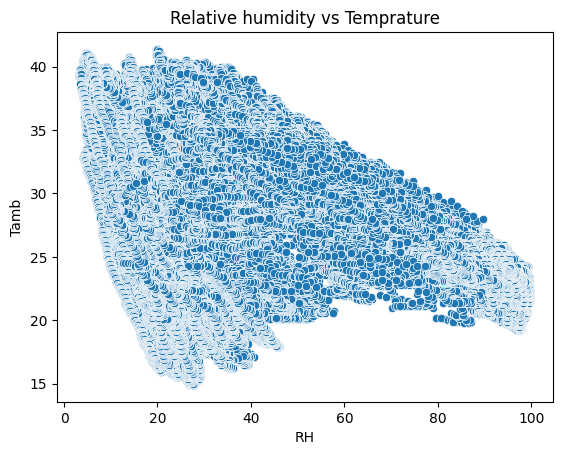

In [24]:
sns.scatterplot(x = togo_df['RH'], y = togo_df['Tamb'])
plt.title("Relative humidity vs Temprature")
plt.show()

# Creating Histograms for GHI, DNI, DHI, WS, and tempratures

<function matplotlib.pyplot.show(close=None, block=None)>

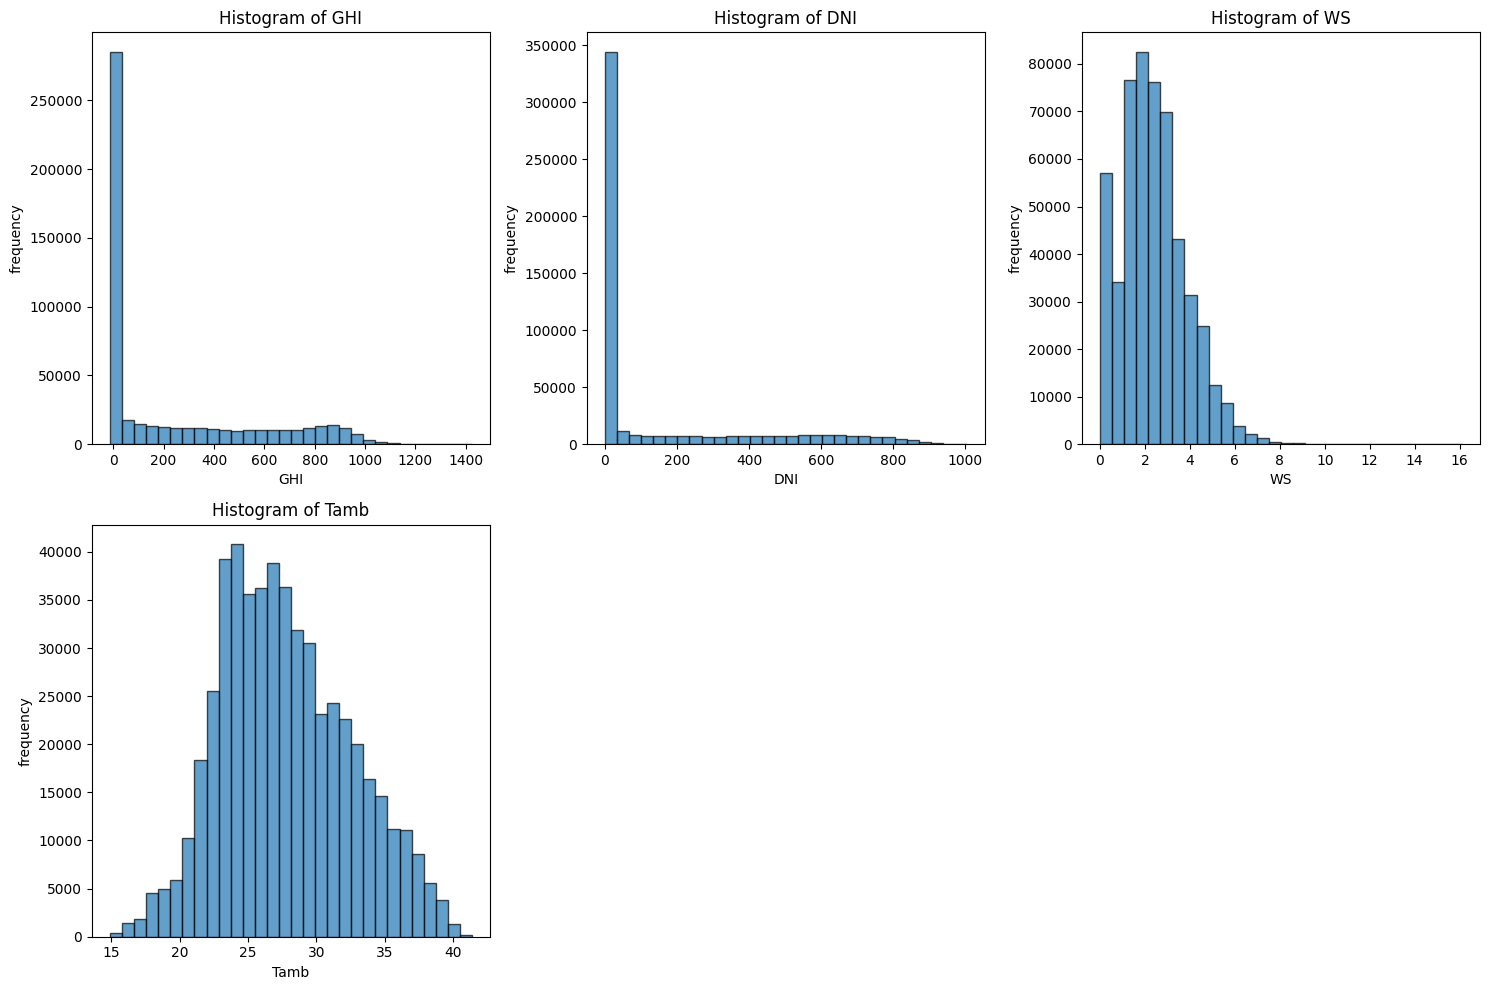

In [26]:
columns = ['GHI', 'DNI', 'WS', 'Tamb']
data = togo_df[columns]
plt.figure(figsize = (15, 10))
for i, column in enumerate(data, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[column], bins = 30, edgecolor = "black", alpha = 0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show

In [ ]:
z_scores = zscore(togo_df[['GHI', 'DNI', 'DHI']])
togo_df['Z_GHI'] = z_scores[:,0]
togo_df['Z_DNI'] = z_scores[:,1]
togo_df['Z_DHI'] = z_scores[:,2]
outliers = togo_df[(togo_df['Z_GHI'].abs() > 3.5) |
           (togo_df['Z_DNI'].abs() > 3.5) |
           (togo_df['Z_DHI'].abs() > 3.5)]
print(outliers.count().sum())

# Bubble charts

In [ ]:
plt.scatter(togo_df['GHI'], togo_df['Tamb'], s=togo_df['RH']*10, c = togo_df['WS'], alpha=0.5, cmap = 'viridis')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with Bubble Size Representing RH')
plt.colorbar(label = 'WS')
plt.show()